In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt

In [9]:
columns = ['x', 'y']
df = pd.read_csv('/content/data_k_mean.txt', header = None, sep = ' ', names = columns)

In [10]:
k = 2
centroids = df.sample(n=k)

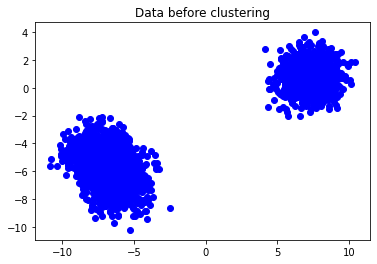

In [11]:
plt.scatter(df['x'], df['y'], c="blue")
plt.title("Data before clustering")
plt.show()

In [12]:
def euclidean_distance(row1, row2):
  distance = 0.0
  for i in range(len(row1)):
    distance += (row1[i] - row2[i])**2
  return sqrt(distance)

In [13]:
previous_output = []

while 1:
  output = []
  for ind in df.index:
    cluster = 1
    distance = []
    row1 = []
    row1.append(df['x'][ind])
    row1.append(df['y'][ind])
    for c in centroids.index:
      row2 = []
      row2.append(centroids['x'][c])
      row2.append(centroids['y'][c])
      dist = euclidean_distance(row1,row2)
      distance.append((dist, cluster))
      cluster+=1

    distance.sort()
    output.append(distance[0][1])

  df["Cluster"] = output
  centroids_new = df.groupby(["Cluster"]).mean()[["x","y"]]
  
  if output == previous_output:
    break

  previous_output = output
  centroids = centroids_new

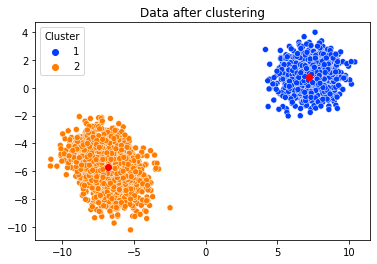

In [14]:
ax = sns.scatterplot(x = 'x', y = 'y', data=df, hue = 'Cluster', palette = sns.color_palette("bright", k))
ax.set(xlabel=None)
ax.set(ylabel=None)
plt.scatter(centroids['x'], centroids['y'], c='red')
plt.title("Data after clustering")
plt.show()